In [18]:
import sys
#!{sys.executable} -m pip install pandas
import pandas as pd
import numpy as np
import os
#!{sys.executable} -m pip install seaborn
import seaborn as sns

import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings

import utils.exploratoryUtils

warnings.filterwarnings('ignore')

In [22]:
paths = []
labels = []
for dirname, _, filenames in os.walk('../tess'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
if len(labels) > 0 and len(paths) > 0:
    print ('dataset is loaded')
else:
    print("dataset error")


dataset is loaded


*Convert into a dataframe*

In [23]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,../tess/OAF_disgust/OAF_bath_disgust.wav,disgust
1,../tess/OAF_disgust/OAF_live_disgust.wav,disgust
2,../tess/OAF_disgust/OAF_when_disgust.wav,disgust
3,../tess/OAF_disgust/OAF_rag_disgust.wav,disgust
4,../tess/OAF_disgust/OAF_chair_disgust.wav,disgust


### Exploratory Data Analysis

<AxesSubplot: xlabel='label', ylabel='count'>

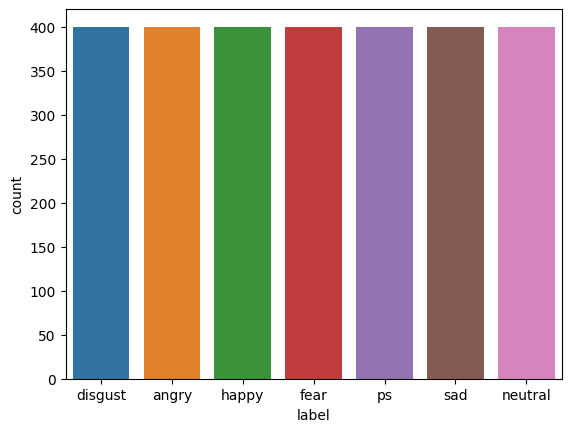

In [24]:
sns.countplot(x ='label', data= df)

In [18]:
#import sys
#module_path = os.path.abspath(os.path.join('..', 'utils'))
#if module_path not in sys.path:
#    sys.path.append(module_path)

In [30]:
import sys
from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
#__file__ = str(Path.cwd().parents[0] / "utils")
# in standard python
module_path = str(Path.cwd().parents[0] / "utils")

if module_path not in sys.path:
    sys.path.append(module_path)
import utils.exploratoryUtils as exU

In [29]:
exU.spectogram()

TypeError: spectogram() missing 3 required positional arguments: 'data', 'sr', and 'emotion'

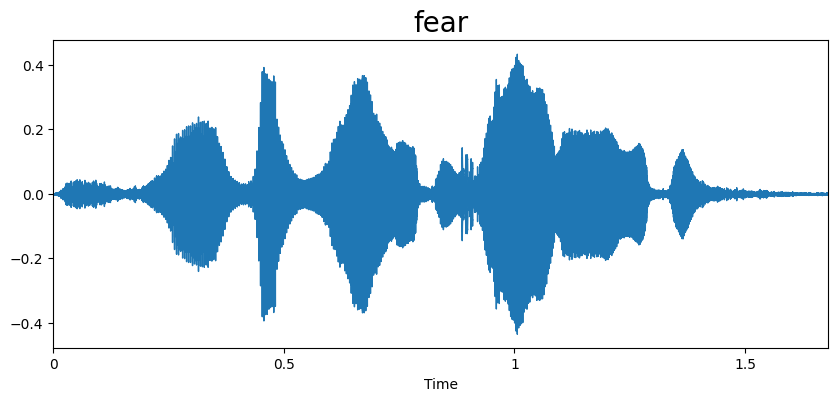

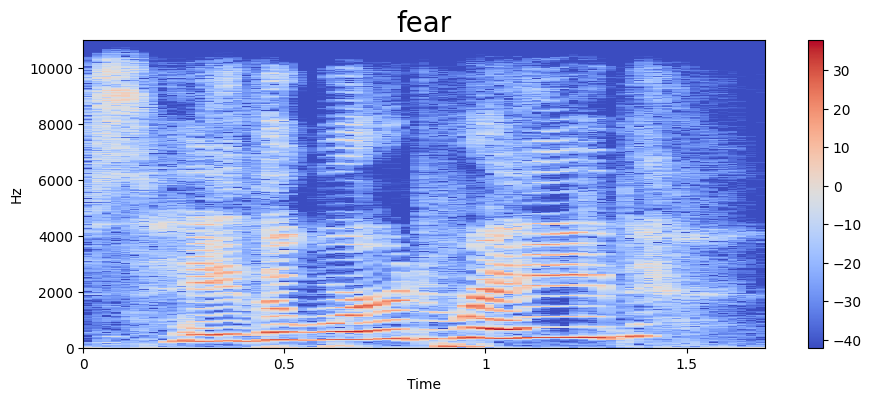

In [31]:
emotion = 'fear'
#df['speech'][df['label'] == 'fear'][1]
path = df['speech'][df['label']==emotion].iloc[0]
data, sampling_rate =librosa.load(path)
exU.waveplot(data, sampling_rate, emotion)
exU.spectogram(data, sampling_rate, emotion)
Audio(path)